## This Project Explores the Ideological Distribution of Americans on Racial Lines During Elections Years.

#### The aim of the project is to see if there is a consistent relationship between race and ideological leanings.

#### The exploration looks at White Americans and Non_White Americans and their ideological identification as Conservative, Liberal, Moderate, or Not Sure.

#### The dataset used is the Cooperative Election Study dataset and can be found at https://cces.gov.harvard.edu/

In [1]:
!pip install pyreadr
!pip install --upgrade seaborn

     ---------------------------------------- 1.3/1.3 MB 328.8 kB/s eta 0:00:00
     ------------------------------------- 294.6/294.6 kB 78.8 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pyreadr
import os

In [3]:
os.getcwd()

os.chdir(r'C:\Users\Dell\Desktop\Data Science\Projects\Race and Politics\cces_2006-2021')

In [4]:
# Reading in the data from R programming language
main_data = pyreadr.read_r(r'C:\Users\Dell\Desktop\Data Science\Projects\Race and Politics\cces_2006-2021\cumulative_2006-2021.rds')[None]

In [5]:
# Selecting the variables of interest
data = main_data[['year','race', 'age', 'gender', 'ideo5']]
data.head()

,year,race,age,gender,ideo5
0,2006,1,32,2,Liberal
1,2006,1,49,1,Moderate
2,2006,1,54,2,Liberal
3,2006,2,34,2,Liberal
4,2006,1,20,1,Liberal


## Data Preprocessing 

In [6]:
data.dropna(inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15560\339833404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [7]:
# Renaming variables
data.rename(columns = {'ideo5' : 'Ideology', 'race':'Race', 'year': 'Year', 'age': 'Age', 'gender' : 'Gender'}, inplace = True)

data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15560\1080949125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'ideo5' : 'Ideology', 'race':'Race', 'year': 'Year', 'age': 'Age', 'gender' : 'Gender'}, inplace = True)


,Year,Race,Age,Gender,Ideology
0,2006,1,32,2,Liberal
1,2006,1,49,1,Moderate
2,2006,1,54,2,Liberal
3,2006,2,34,2,Liberal
4,2006,1,20,1,Liberal


In [8]:
# Checking the counts of the ideology category to see the distribution of Americans who belong to a particular ideology
data['Ideology'].value_counts()

Moderate             166068
Conservative         119314
Liberal               93993
Very Conservative     61568
Very Liberal          50860
Not Sure              38138
Name: Ideology, dtype: int64

In [9]:
# Replacing the integer values with the categorical values in the Race Variable
data = data.assign(Race = data['Race'].replace({1: "White", 2 : 'Non_White', 3 : 'Non_White', 4: 'Non_White', 5: 'Non_White', 6: 'Mixed', 7: 'Non_White', 8: 'Non_White'}))

In [23]:
# Grouping conservatives and very conservatives into one category and doing same for those who identify as Liberals.
data = data.assign(Ideology = data['Ideology'].replace({'Conservative': 'Conservative', 'Very Conservative': 'Conservative', 'Liberal': 'Liberal', 'Very Liberal': 'Liberal'}))

In [24]:
data['Ideology'].value_counts()

Conservative    180882
Moderate        166068
Liberal         144853
Not Sure         38138
Name: Ideology, dtype: int64

In [25]:
# Creating a function that creates dataframe from the main dataframe according to years and liberal and conservative Ideology

def data_year(data, year):
    """this function takes year as an argument and filters the dataset for that year
    Args:
    Year (Date): This is the year used to filter the dataframe
    """

    filtered_data = data[(data['Year'] == year) & data['Ideology'].isin(['Conservative', 'Liberal', 'Moderate'])]
    return filtered_data

In [26]:
# Creating a dataframe for the election year 2008
data_2008 = data_year(data, 2008)
data_2008['Ideology'].value_counts()

Conservative    12360
Moderate        10104
Liberal          7972
Not Sure            0
Name: Ideology, dtype: int64

In [29]:
# Creating Dataframe for election year 2012
data_2012 = data_year(data, 2012)
data_2012['Ideology'].value_counts()

Conservative    20042
Moderate        16365
Liberal         14157
Not Sure            0
Name: Ideology, dtype: int64

In [15]:
# Creating Dataframe for elction year 2016
data_2016 = data_year(data, 2016)
data_2020 = data_year(data, 2020)

In [16]:
data_2020['Race'].value_counts()

White        41320
Non_White    13712
Mixed         1176
Name: Race, dtype: int64

In [31]:
def plot_graph(data, Year):
    """
    this function plots the barplot which describes ideological leanings of whites 
    and non_white Americans
    
    Args:
    Data (Dataframe): Dataframe from which the variables would be collected
    
    Output:
    Barplot
    """
    sns.countplot(x='Race', hue='Ideology', data=data, palette = ['red','blue', 'grey', 'yellow'])
    plt.title('Ideology of Whites and Non_Whites in America During Election {}'.format(Year))
    plt.xlabel('Race')
    plt.ylabel('Population')
    

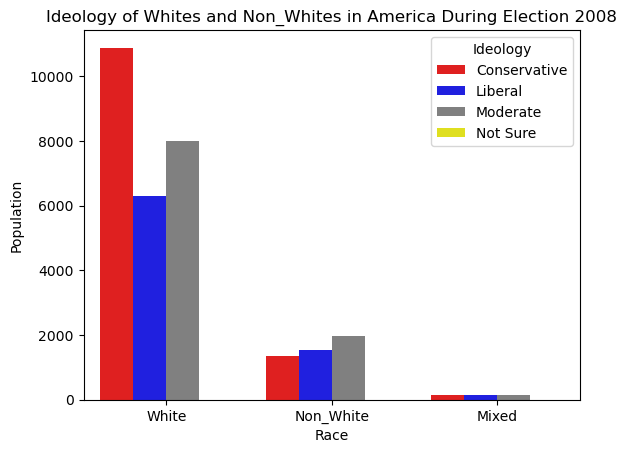

In [32]:
# Plotting ideological leanings by race in the year 2008
plot_graph(data_2008, '2008')
plt.savefig('ideology_leaning_2008.png', dpi = 300)

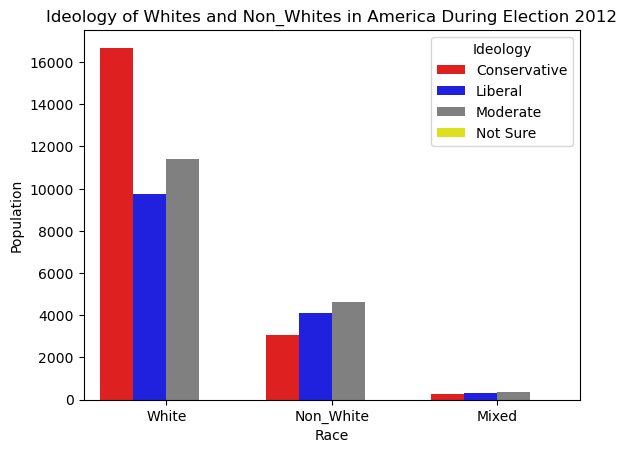

In [33]:
# Plotting ideological leanings by race in the year 2012
plot_graph(data_2012, '2012')
plt.savefig('ideology_leaning_2012.png', dpi = 300)

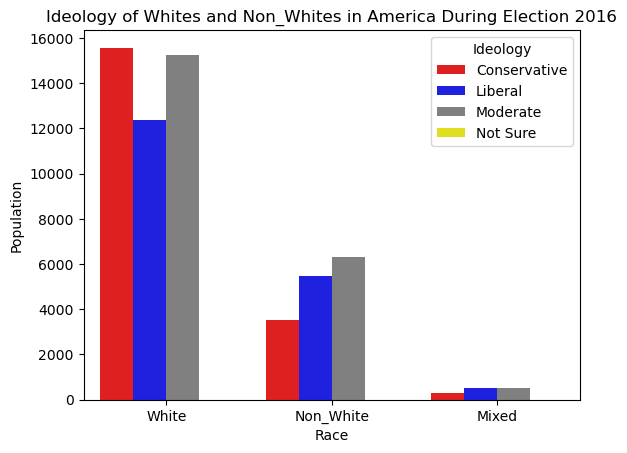

In [34]:
# Plotting ideological leanings by race in the year 2016
plot_graph(data_2016, '2016')
plt.savefig('ideology_leaning_2016.png', dpi = 300)

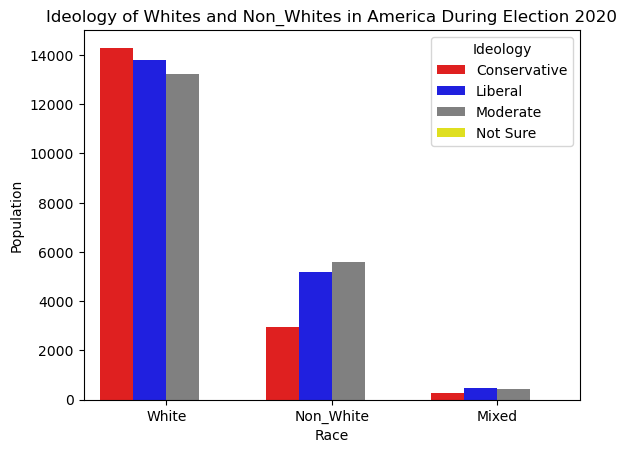

In [35]:
# Plotting ideological leanings by race in the year 2020
plot_graph(data_2020, '2020')
plt.savefig('ideology_leaning_2020.png', dpi = 300)

In [39]:
# Checking the proportional distribution of Different Races in the US
normalized_counts = data.groupby(['Race', 'Ideology']).size().div(len(data)).reset_index(name='Proportion')
normalized_counts

,Race,Ideology,Proportion
0,Mixed,Conservative,0.004727
1,Mixed,Liberal,0.006640
2,Mixed,Moderate,0.006610
3,Mixed,Not Sure,0.002149
4,Non_White,Conservative,0.053732
5,Non_White,Liberal,0.073848
6,Non_White,Moderate,0.086366
7,Non_White,Not Sure,0.023638
8,White,Conservative,0.282865
9,White,Liberal,0.192850


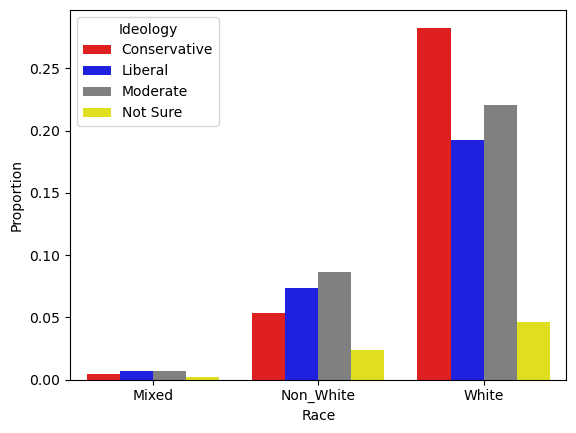

In [43]:
sns.barplot(x='Race', y='Proportion', hue='Ideology', palette = ['red','blue', 'grey', 'yellow'], data=normalized_counts)
plt.show()

### The Data Proportional Distribution Suggests that More White American are conservative, more Non_White and Mixed Race identify as liberals.